# Удержание отточных клиентов.

## Определение целей исследования.

### Условие.

Заказчик — менеджер из отдела маркетинга, кроме вашей презентации он не будет ничего смотреть, наша главная цель с ним — помочь банку! Привлекать новых клиентов дорого, дешевле удержать тех, про которых мы уже что-то знаем и с которыми работаем. В нашем отделе маркетинга нет автоматизированных систем рассылок, письма каждому клиенту пишутся вручную.

### Задача.

Максимально эффективно выделить сегменты отточных клиентов, чтобы они были однородными, высокоотточными и покрывали максимум проблемных зон банка. Таким образом, маркетинговое воздействие на эти сегменты должно привести к уменьшению оттока.

## Знакомство с данными.

### Содержание таблицы.

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**USERID** — идентификатор пользователя,  
**score** — баллы кредитного скоринга, (от 0 до 1000)  
**city** — город, (отделение банка)  
**gender** — пол,  
**age** — возраст,  
**equity** — количество баллов собственности, (от 0 до 9)  
**balance** — баланс на счёте, (общая сумма)  
**products** — количество продуктов, которыми пользуется клиент, (от 0 до 5)  
**credit_card** — есть ли кредитная карта, ( 0 - нет, 1 - есть)  
**last_activity** — активный клиент, ( 0 - не активный, 1 - активный)  
**EST_SALARY** — оценочный доход клиента, (общий доход клиента)  
**сhurn** — признак оттока. (0 - не отточный, 1 - отточный)  

### Загрузка библиотек.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from collections import Counter

### Загрузка данных.

In [2]:
try:
    events = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    events = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
    
    events.to_csv('bank_scrooge.csv', index = False)
pd.options.display.max_colwidth = 150

Посмотрим таблицу.

In [3]:
events.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


Посмотрим общую информацию.

In [4]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


В наборе данных присутствует 10000 строк, 12 колонок из них 4 колонки типа *float64*, 6 колонок типа *int64* и 2 колонки типа *object*.  
  
Требует исправления:
- Наименования колонок нужно привести к единому виду.
- Колонки *score* и *age* привести к типу *int64*.
- Исследовать и по возможности исправить пропуски.
- Провести кодировку данных колонок *gender* и *city*.
- Проверить дубликаты.

## Предобработка данных.

### Названия колонок.

Приведём названия колонок к единому стилю.

In [5]:
events = events.rename(columns = {'USERID': 'user_id', 'EST_SALARY': 'est_salary'})

events.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Типы данных.

Заменим тип данных у колонок *score* и *age*.

In [6]:
events['score'] = events['score'].astype('int64')

events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  int64  
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


В колонке *age* присутствуют пропуски по этому сначала обработаем их.  
Посмотрим сколько пропусков.

In [7]:
print(f'Всего - ', events['age'].isna().sum(), 'пропусков.')
print((events['age'].isna().sum() / len(events)) * 100, f'% составляют пропуски.')

Всего -  26 пропусков.
0.26 % составляют пропуски.


Посмотрим в таблице.

In [8]:
events[events['age'].isna()].head(26)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Посмотрим распределение возраста на графике.

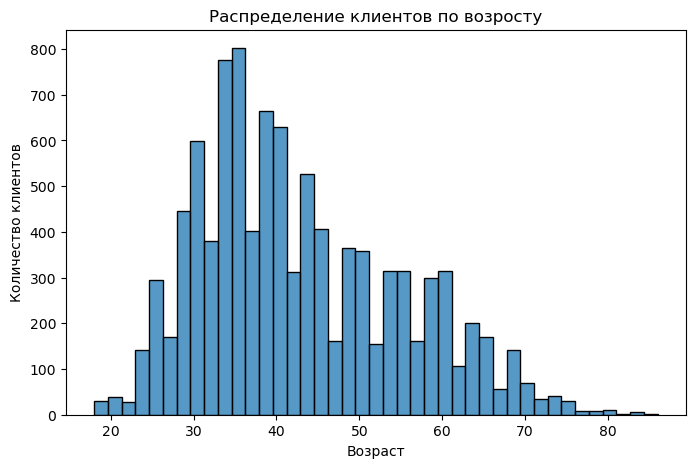

In [9]:
plt.figure(figsize = (8,5))
sns.histplot(events, x = 'age')
plt.title('Распределение клиентов по возросту')
plt.ylabel('Количество клиентов')
plt.xlabel('Возраст')
plt.show()

Основная масса клиентов имеет возраст от 24 до 68 лет.  
больше всего клиентов в возрасте 34 - 36 лет.

Сделаем срез данных, где пропущен возраст, и сравним средние значения. 

In [10]:
events_nan = events.dropna(subset = ['age'])
nan_age = events.query('age.isna()')

print(f'Средние значения признаков датафрейма без пропусков в столбце age')
print(round(events_nan.mean(numeric_only=True), 2))
print('------------------------------')
print(f'Средние значения признаков датафрейма с пропусками в столбце age')
print(round(nan_age.mean(numeric_only=True), 2))

Средние значения признаков датафрейма без пропусков в столбце age
user_id          171755.22
score               848.68
age                  42.73
equity                2.63
balance          827245.59
products              1.87
credit_card           0.68
last_activity         0.52
est_salary       147786.81
churn                 0.18
dtype: float64
------------------------------
Средние значения признаков датафрейма с пропусками в столбце age
user_id           194637.50
score                855.15
age                     NaN
equity                 1.38
balance          1250033.57
products               1.35
credit_card            0.77
last_activity          0.77
est_salary        178585.20
churn                  0.04
dtype: float64


Посмотрим пропуски в столбце *age* по городам.

In [11]:
nan_age.groupby('city')['city'].count()

city
Ростов        1
Рыбинск      12
Ярославль    13
Name: city, dtype: int64

Сравним средние значения.

In [12]:
print(f'Средние значения признаков датафрейма без пропусков в столбце age')
print(round(events_nan.groupby('city').mean(numeric_only=True), 2).T)
print('------------------------------------------------------')
print(f'Средние значения признаков датафрейма с пропусками в столбце age')
print(round(nan_age.groupby('city').mean(numeric_only=True), 2).T)

Средние значения признаков датафрейма без пропусков в столбце age
city              Ростов    Рыбинск  Ярославль
user_id        169044.13  172508.76  172064.52
score             842.64     848.60     850.18
age                44.14      43.33      42.13
equity              2.80       2.61       2.60
balance        661523.93  715884.61  924424.95
products            1.86       1.82       1.90
credit_card         0.57       0.64       0.72
last_activity       0.53       0.56       0.50
est_salary     111518.46  134775.31  162470.36
churn               0.19       0.16       0.19
------------------------------------------------------
Средние значения признаков датафрейма с пропусками в столбце age
city              Ростов    Рыбинск   Ярославль
user_id        138660.00  198790.17   195110.23
score             836.00     863.67      848.77
age                  NaN        NaN         NaN
equity              5.00       1.42        1.08
balance        294315.53  598025.63  2303973.01
products 

Посмотрим по отточным клиентам.

In [13]:
nan_age.groupby('churn')['churn'].count()

churn
0    25
1     1
Name: churn, dtype: int64

Сравним средние значение.

In [14]:
print(f'Средние значения признаков датафрейма без пропусков в столбце age')
print(round(events_nan.groupby('churn').mean(numeric_only=True), 2).T)
print('------------------------------------------------------')
print(f'Средние значения признаков датафрейма с пропусками в столбце age')
print(round(nan_age.groupby('churn').mean(numeric_only=True), 2).T)

Средние значения признаков датафрейма без пропусков в столбце age
churn                  0           1
user_id        171928.11   170980.10
score             845.40      863.42
age                43.02       41.45
equity              2.38        3.76
balance        733031.63  1134458.21
products            1.76        2.38
credit_card         0.71        0.55
last_activity       0.48        0.70
est_salary     147674.64   148289.70
------------------------------------------------------
Средние значения признаков датафрейма с пропусками в столбце age
churn                   0          1
user_id         196876.60  138660.00
score              855.92     836.00
age                   NaN        NaN
equity               1.24       5.00
balance        1356224.47  294315.53
products             1.32       2.00
credit_card          0.80       0.00
last_activity        0.76       1.00
est_salary      183196.20   63310.22


Зависимости пропусков в столбце *age* от остальных данных не найдена.  
Так как пропуски составляют 0,26% и не могут сильно повлиять на результат, то их удаляем.

In [15]:
eventss = events
eventss = eventss.dropna(subset = ['age'])

In [16]:
eventss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1013.0+ KB


In [17]:
eventss['age'] = eventss['age'].astype('int64')
eventss['age'].isna().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_46472\2950359549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventss['age'] = eventss['age'].astype('int64')


0

### Пропуски.

In [18]:
eventss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1013.0+ KB


Пропуски остались только в колонке *balance*.  
  
Посмотрим количество пропусков.

In [19]:
print(f'Всего - ', eventss['balance'].isna().sum(), 'пропусков.')
print(round((eventss['balance'].isna().sum() / len(eventss)) * 100, 2), f'% составляют пропуски.')

Всего -  2279 пропусков.
22.85 % составляют пропуски.


Выведем в случайном порядке 20 строк с пропусками.

In [20]:
eventss[eventss['balance'].isna()].sample(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9710,196475,934,Ярославль,М,36,0,NaN,1,1,1,225174.89,0
6934,171569,951,Рыбинск,Ж,58,0,NaN,1,0,1,126616.52,0
4068,212792,899,Ярославль,Ж,27,0,NaN,1,1,0,162230.01,0
1332,201602,906,Ростов,Ж,37,0,NaN,1,1,1,184140.30,0
6657,143750,898,Ярославль,М,38,0,NaN,1,0,0,216805.04,0
4868,167314,912,Ярославль,М,46,0,NaN,3,0,0,491084.72,0
2867,122587,922,Рыбинск,Ж,49,0,NaN,1,1,0,71367.97,0
7853,117925,934,Ярославль,Ж,40,0,NaN,1,1,1,313597.68,0
4370,226049,936,Ярославль,М,43,0,NaN,1,0,0,150917.50,0
3568,174109,954,Ярославль,М,40,1,NaN,1,1,0,222482.33,0


Cравним средние значения.

In [21]:
eventss_nan = eventss.dropna(subset = ['balance'])
nan_balance = eventss.query('balance.isna()')

In [22]:
print(f'Средние значения признаков датафрейма без пропусков в столбце balance')
print(round(eventss_nan.mean(numeric_only=True), 2))
print('------------------------------')
print(f'Средние значения признаков датафрейма с пропусками в столбце balance')
print(round(nan_balance.mean(numeric_only=True), 2))

Средние значения признаков датафрейма без пропусков в столбце balance
user_id          171710.89
score               843.74
age                  42.92
equity                3.39
balance          827245.59
products              2.08
credit_card           0.64
last_activity         0.52
est_salary       124520.39
churn                 0.23
dtype: float64
------------------------------
Средние значения признаков датафрейма с пропусками в столбце balance
user_id          171904.89
score               865.36
age                  42.09
equity                0.05
balance                NaN
products              1.16
credit_card           0.82
last_activity         0.55
est_salary       226345.42
churn                 0.01
dtype: float64


Посмотрим количество пропусков по городам.

In [23]:
nan_balance.groupby('city')['city'].count()

city
Ростов        235
Рыбинск       586
Ярославль    1458
Name: city, dtype: int64

Посмотрим средние значения.

In [24]:
print(f'Средние значения признаков датафрейма без пропусков в столбце balance')
print(round(eventss_nan.groupby('city').mean(numeric_only=True), 2).T)
print('------------------------------------------------------')
print(f'Средние значения признаков датафрейма с пропусками в столбце balance')
print(round(nan_balance.groupby('city').mean(numeric_only=True), 2).T)

Средние значения признаков датафрейма без пропусков в столбце balance
city              Ростов    Рыбинск  Ярославль
user_id        168907.20  171482.57  172568.93
score             837.02     844.88     845.00
age                44.25      43.40      42.35
equity              3.35       3.33       3.44
balance        661523.93  715884.61  924424.95
products            2.00       1.99       2.15
credit_card         0.55       0.61       0.68
last_activity       0.52       0.56       0.49
est_salary     103767.86  113903.51  135109.56
churn               0.22       0.21       0.25
------------------------------------------------------
Средние значения признаков датафрейма с пропусками в столбце balance
city              Ростов    Рыбинск  Ярославль
user_id        169732.28  176180.97  170536.42
score             870.91     861.91     865.85
age                43.62      43.07      41.45
equity              0.04       0.04       0.06
balance              NaN        NaN        NaN
product

Посмотрим количество пропусков по отточным клиентам.

In [25]:
nan_balance.groupby('churn')['churn'].count()

churn
0    2266
1      13
Name: churn, dtype: int64

Посмотрим средние значения.

In [26]:
print(f'Средние значения признаков датафрейма без пропусков в столбце balance')
print(round(eventss_nan.groupby('churn').mean(numeric_only=True), 2).T)
print('------------------------------------------------------')
print(f'Средние значения признаков датафрейма с пропусками в столбце balance')
print(round(nan_balance.groupby('churn').mean(numeric_only=True), 2).T)

Средние значения признаков датафрейма без пропусков в столбце balance
churn                  0           1
user_id        171901.14   171090.52
score             837.67      863.56
age                43.39       41.40
equity              3.27        3.79
balance        733031.63  1134458.21
products            1.99        2.38
credit_card         0.67        0.55
last_activity       0.46        0.71
est_salary     117599.73   147087.28
------------------------------------------------------
Средние значения признаков датафрейма с пропусками в столбце balance
churn                  0          1
user_id        171998.19  155640.54
score             865.48     843.08
age                42.06      47.77
equity              0.05       0.23
balance              NaN        NaN
products            1.16       1.46
credit_card         0.82       0.85
last_activity       0.55       0.23
est_salary     225834.89  315334.21


Зависимость пропусков в столбце *balance* от остальных данных есть.  
Предлагаю оставить пропуски как есть, так как пропуски составляют 22,85% от всех данных и так как есть значительная разница между показателями в оценке собственности и доходах клиентов.  
Удаление или заполнение приведёт к сильным искажениям результатов.

### Кодирование.

Закодируем столбец *gender* численно. Женский пол 0, мужской - 1.

In [27]:
eventss = pd.get_dummies(eventss, columns = ['gender'], drop_first=True)

eventss.head()

,user_id,score,city,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М
0,183012,850,Рыбинск,25,1,59214.82,2,0,1,75719.14,1,False
1,146556,861,Рыбинск,37,5,850594.33,3,1,0,86621.77,0,False
2,120722,892,Рыбинск,30,0,NaN,1,1,1,107683.34,0,False
3,225363,866,Ярославль,51,5,1524746.26,2,0,1,174423.53,1,False
4,157978,730,Ярославль,34,5,174.00,1,1,0,67353.16,1,True


Добавляем обратно столбец *gender*.

In [28]:
eventss.insert ( 5 , 'gender', events['gender'])
eventss.head()

,user_id,score,city,age,equity,gender,balance,products,credit_card,last_activity,est_salary,churn,gender_М
0,183012,850,Рыбинск,25,1,Ж,59214.82,2,0,1,75719.14,1,False
1,146556,861,Рыбинск,37,5,Ж,850594.33,3,1,0,86621.77,0,False
2,120722,892,Рыбинск,30,0,Ж,NaN,1,1,1,107683.34,0,False
3,225363,866,Ярославль,51,5,Ж,1524746.26,2,0,1,174423.53,1,False
4,157978,730,Ярославль,34,5,М,174.00,1,1,0,67353.16,1,True


Приводим столбец *gender_М* к типу *int64*.

In [29]:
eventss['gender_М'] = eventss['gender_М'].astype('int64')
eventss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   age            9974 non-null   int64  
 4   equity         9974 non-null   int64  
 5   gender         9974 non-null   object 
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
 12  gender_М       9974 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1.1+ MB


Закодируем колонку *city*.

In [30]:
eventss = pd.get_dummies(eventss, columns = ['city'])
eventss.head()

,user_id,score,age,equity,gender,balance,products,credit_card,last_activity,est_salary,churn,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850,25,1,Ж,59214.82,2,0,1,75719.14,1,0,False,True,False
1,146556,861,37,5,Ж,850594.33,3,1,0,86621.77,0,0,False,True,False
2,120722,892,30,0,Ж,NaN,1,1,1,107683.34,0,0,False,True,False
3,225363,866,51,5,Ж,1524746.26,2,0,1,174423.53,1,0,False,False,True
4,157978,730,34,5,М,174.00,1,1,0,67353.16,1,1,False,False,True


Вернём колонку *city*.

In [31]:
eventss.insert ( 3, 'city', events['city'])
eventss.head()

,user_id,score,age,city,equity,gender,balance,products,credit_card,last_activity,est_salary,churn,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850,25,Рыбинск,1,Ж,59214.82,2,0,1,75719.14,1,0,False,True,False
1,146556,861,37,Рыбинск,5,Ж,850594.33,3,1,0,86621.77,0,0,False,True,False
2,120722,892,30,Рыбинск,0,Ж,NaN,1,1,1,107683.34,0,0,False,True,False
3,225363,866,51,Ярославль,5,Ж,1524746.26,2,0,1,174423.53,1,0,False,False,True
4,157978,730,34,Ярославль,5,М,174.00,1,1,0,67353.16,1,1,False,False,True


Приведём новые колонки к типу *int64*.

In [32]:
eventss['city_Ростов'] = eventss['city_Ростов'].astype('int64')
eventss['city_Рыбинск'] = eventss['city_Рыбинск'].astype('int64')
eventss['city_Ярославль'] = eventss['city_Ярославль'].astype('int64')
eventss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         9974 non-null   int64  
 1   score           9974 non-null   int64  
 2   age             9974 non-null   int64  
 3   city            9974 non-null   object 
 4   equity          9974 non-null   int64  
 5   gender          9974 non-null   object 
 6   balance         7695 non-null   float64
 7   products        9974 non-null   int64  
 8   credit_card     9974 non-null   int64  
 9   last_activity   9974 non-null   int64  
 10  est_salary      9974 non-null   float64
 11  churn           9974 non-null   int64  
 12  gender_М        9974 non-null   int64  
 13  city_Ростов     9974 non-null   int64  
 14  city_Рыбинск    9974 non-null   int64  
 15  city_Ярославль  9974 non-null   int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 1.3+ MB


### Поиск дубликатов.

Проверим явные дубликаты.

In [33]:
print(f'Количество дубликатов - ', eventss.duplicated().sum())

Количество дубликатов -  0


Посмотрим не явные дубликаты.

In [34]:
eventss['user_id'].value_counts()

user_id
195884    2
117943    2
220816    2
185748    2
126368    2
         ..
125665    1
125361    1
199413    1
205705    1
96267     1
Name: count, Length: 9924, dtype: int64

In [35]:
print(f'Количество не явных дубликатов - ', len(eventss) - len(eventss['user_id'].value_counts()))

Количество не явных дубликатов -  50


Количество не явных дубликатов всего 50, по этому принимаю решение их удалить, так как на общий результат они не повлияют.

In [36]:
eventss.drop_duplicates(subset = ['user_id'], inplace = True)
len(eventss)

9924

Промежуточный вывод:  
  
- Названия колонок приведены к единому стилю.
- Заменили тип данных у колонок *score* и *age*.
- Удалили пропуски в столбце *age*.
- Пропуски в столбце *balance* решено оставить, так как при их удалении или заполнении можем получить искажение результатов.
- Проведено кодирование столбцов *gender* и *city*.
- Сделанно удаление не явных дубликатов в столбце *user_id*.

## Исследовательский анализ данных.

###  Портрет клиента.

Посмотрим количество отточных и не отточных клиентов.

In [37]:
churn_perc = eventss.groupby('churn').agg({'churn': 'count'})
churn_perc

,churn
churn,
0,8105
1,1819


Посмотрим на графике.

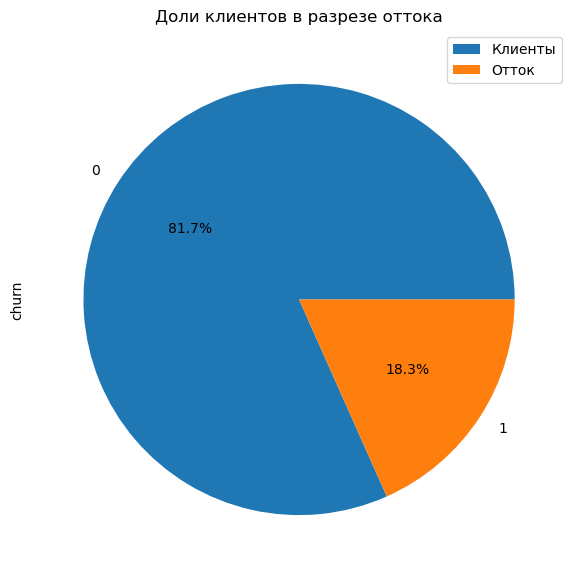

In [38]:
churn_perc.plot(kind = 'pie', y = 'churn', autopct = '%1.1f%%', figsize = (7,7))
plt.title('Доли клиентов в разрезе оттока')
plt.legend(['Клиенты', 'Отток'])
plt.show()

Доля отточных клиентов составляет 18,3%.

Для лучшей визуализации создадим дополнительные столбцы, на основе столбцов *credit_card* и *last_activity*.

In [39]:
eventss['credit_card_es'] = events.loc[ :, 'credit_card']
eventss['last_activity_es'] = eventss.loc[ :, 'last_activity']

In [40]:
eventss.head()

,user_id,score,age,city,equity,gender,balance,products,credit_card,last_activity,est_salary,churn,gender_М,city_Ростов,city_Рыбинск,city_Ярославль,credit_card_es,last_activity_es
0,183012,850,25,Рыбинск,1,Ж,59214.82,2,0,1,75719.14,1,0,0,1,0,0,1
1,146556,861,37,Рыбинск,5,Ж,850594.33,3,1,0,86621.77,0,0,0,1,0,1,0
2,120722,892,30,Рыбинск,0,Ж,NaN,1,1,1,107683.34,0,0,0,1,0,1,1
3,225363,866,51,Ярославль,5,Ж,1524746.26,2,0,1,174423.53,1,0,0,0,1,0,1
4,157978,730,34,Ярославль,5,М,174.00,1,1,0,67353.16,1,1,0,0,1,1,0


In [41]:
eventss['products'].value_counts()

products
2    5095
1    3306
3    1029
4     474
5      19
0       1
Name: count, dtype: int64

In [42]:
eventss.query('products == 0').head() 

,user_id,score,age,city,equity,gender,balance,products,credit_card,last_activity,est_salary,churn,gender_М,city_Ростов,city_Рыбинск,city_Ярославль,credit_card_es,last_activity_es
8957,147837,962,79,Рыбинск,3,Ж,NaN,0,0,0,25063.96,1,0,0,1,0,0,0


В колонке *products* обнаруженно одно нулевое значение. Предполагаю что это ошибка в данных, по этому удаляем.

In [43]:
index_names = eventss[ eventss['products'] == 0 ].index
eventss.drop(index_names, inplace = True)
eventss['products'].value_counts()

products
2    5095
1    3306
3    1029
4     474
5      19
Name: count, dtype: int64

Создадим функцию для формирования графиков распределения.  
*hue* - признак, по которому мы хотим увидеть детализацию данных.

In [44]:
def distr_charts(eventss, hue):
    # дискретные величины:
    for column in ['city', 'gender', 'equity', 'products', 'credit_card_es', 'last_activity_es']:
        common_churn_level = eventss['churn'].mean() * 100
        columns_churn = eventss.groupby(column)['churn'].mean() * 100
        
        plt.figure(figsize=(8, 5))
        plt.axhline(y = common_churn_level, linewidth = 2, linestyle = '--', color = 'k')
        ax = columns_churn.plot(kind = 'bar', color = 'c')
        plt.xticks(rotation = 0)
        plt.title(f'Процент оттока клиентов по категории {column} относительно среднего по банку')
        plt.ylabel('% оттока')
        plt.show()

    # непрерывные:
    for column in ['score',  'balance', 'est_salary']:
        plt.figure(figsize = (8,5))
        sns.kdeplot(data = eventss, x = column, hue = hue, common_norm = False);
        plt.title(f'Распределение клиентов по признаку {column}')
        plt.legend(['Отток', 'Клиенты'])
        plt.ylabel('Плотность')
        plt.show()
        
    # столбец age, поскольку у него по оси у много значений, ему нужно подобрать другой размер
    plt.figure(figsize = (20,8))
    sns.histplot(data = eventss, x = 'age', hue = hue, stat = "density", common_norm = False);
    plt.title('Распределение клиентов по признаку "age" возраст')
    plt.legend(['Отток', 'Клиенты'])
    plt.xlabel('Возраст')
    plt.ylabel('Плотность')
    plt.show()

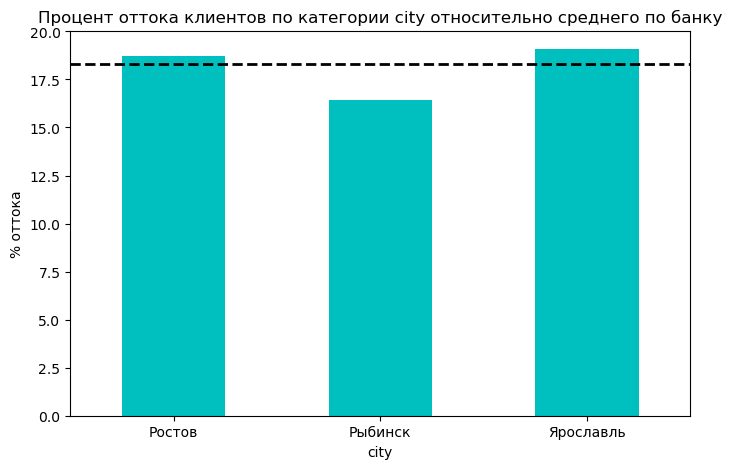

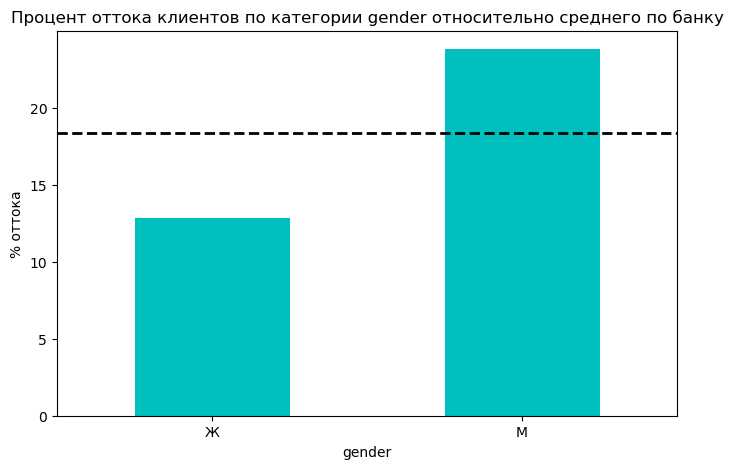

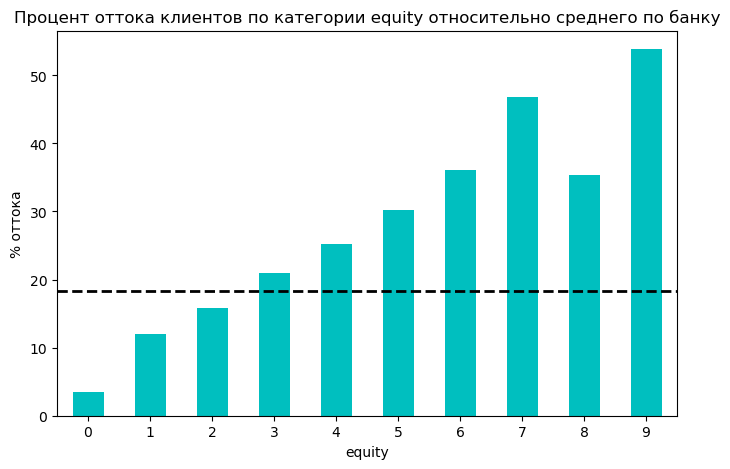

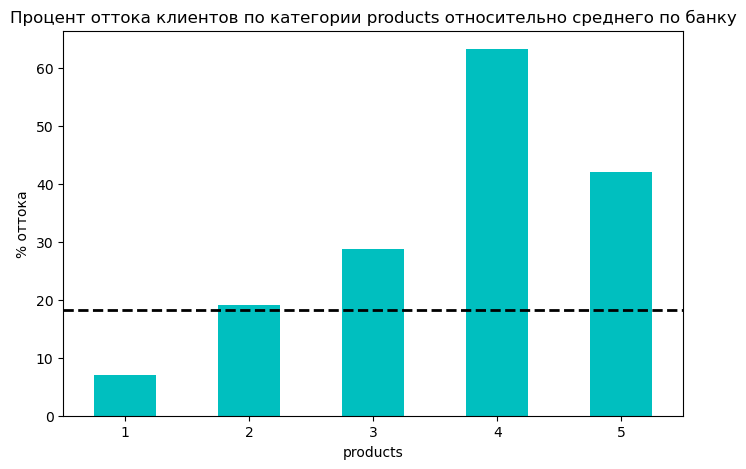

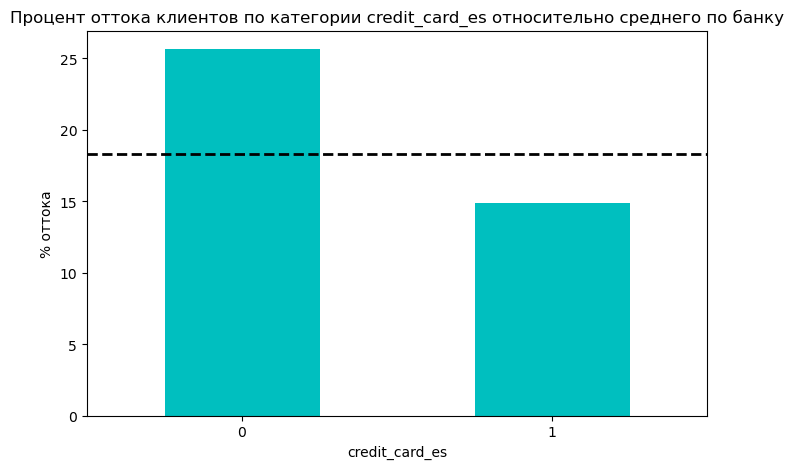

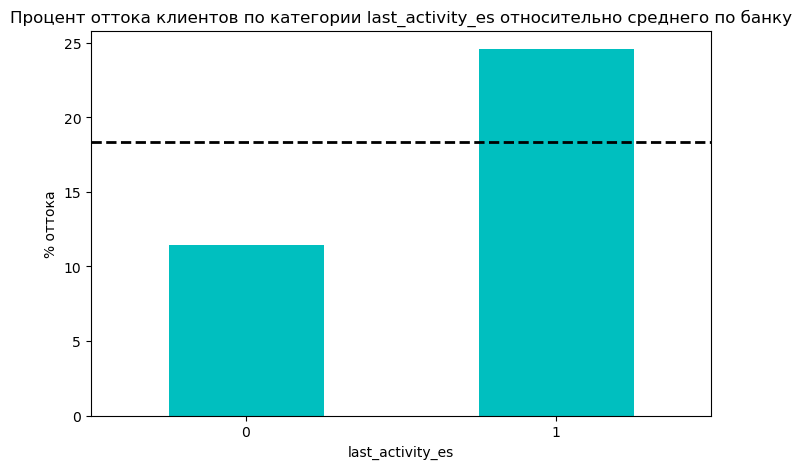

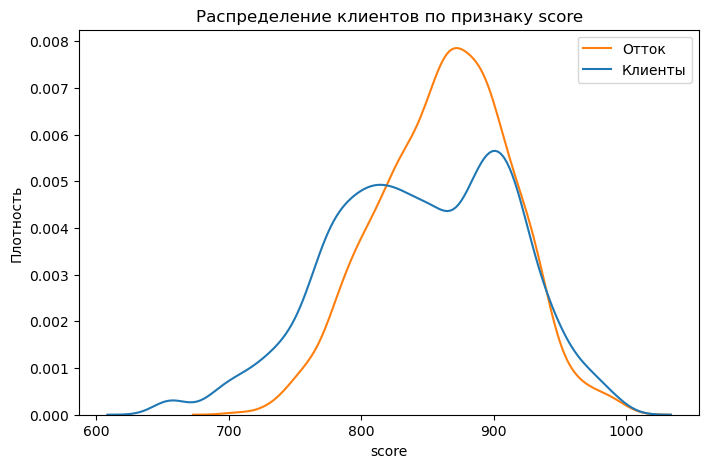

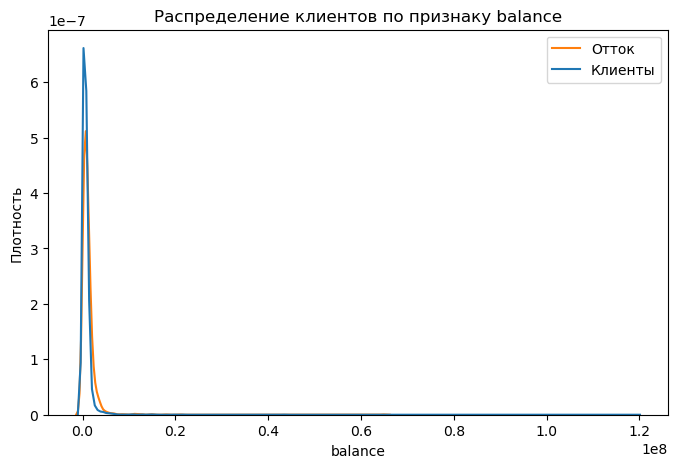

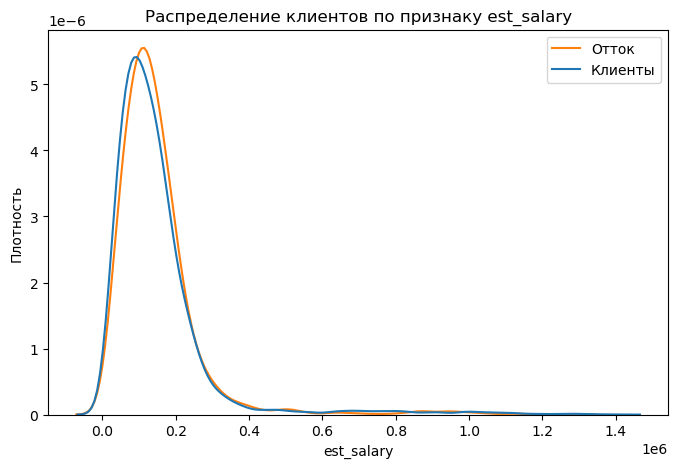

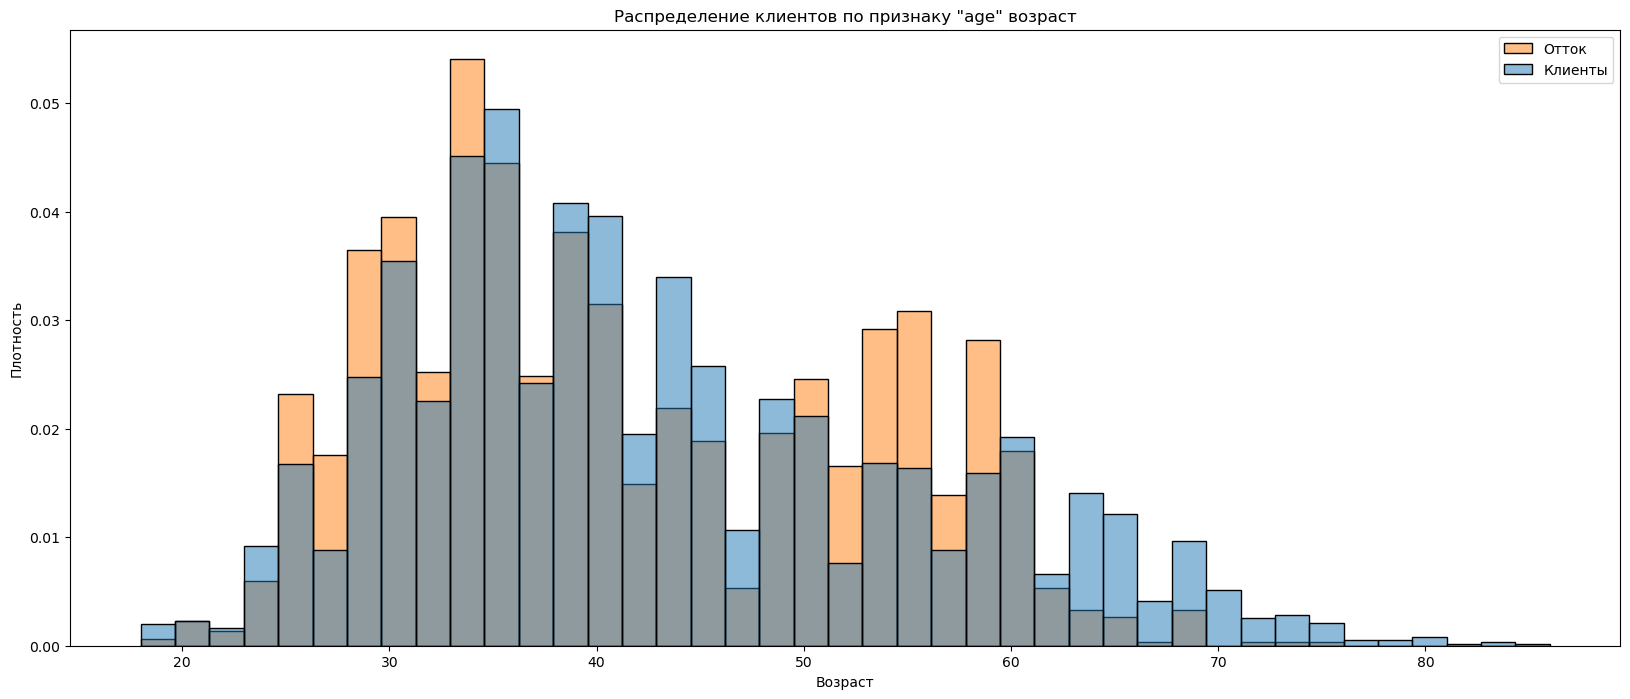

In [45]:
distr_charts(eventss, 'churn')

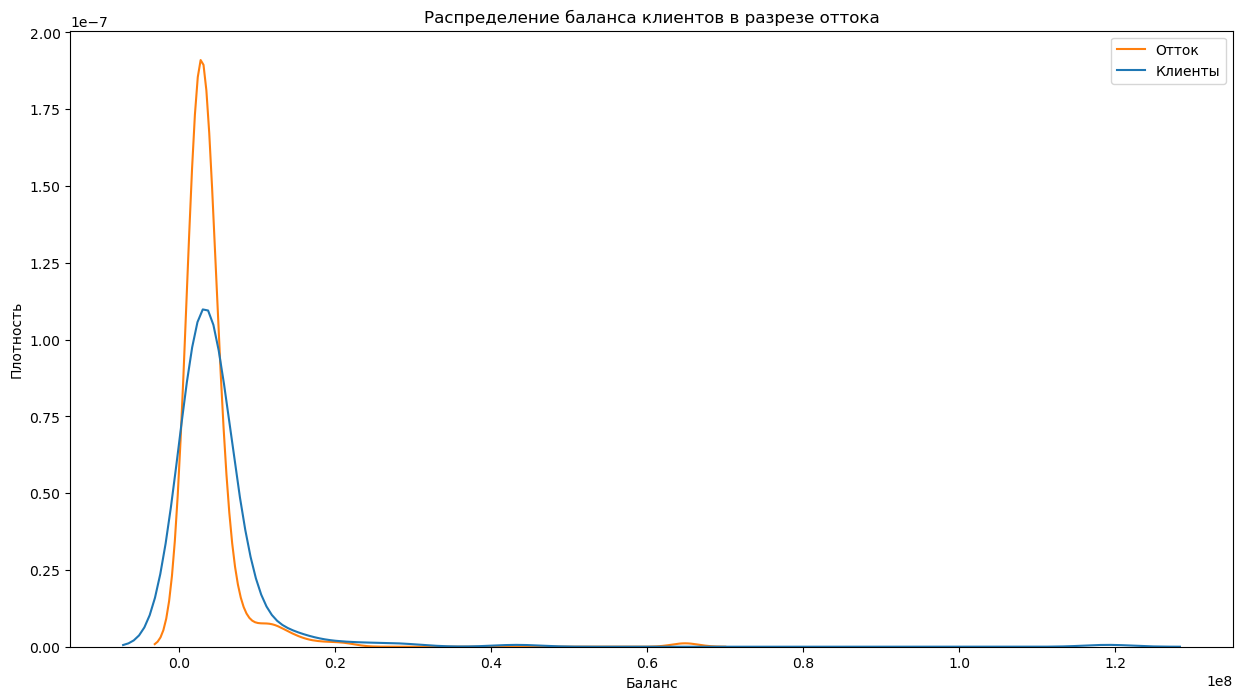

In [46]:
eventss_balance = eventss.query('2000000 <= balance')
plt.figure(figsize=(15,8))
sns.kdeplot(data = eventss_balance, x = 'balance', hue = 'churn', common_norm = False);
plt.title(f'Распределение баланса клиентов в разрезе оттока')
plt.legend(['Отток', 'Клиенты'])
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.show()

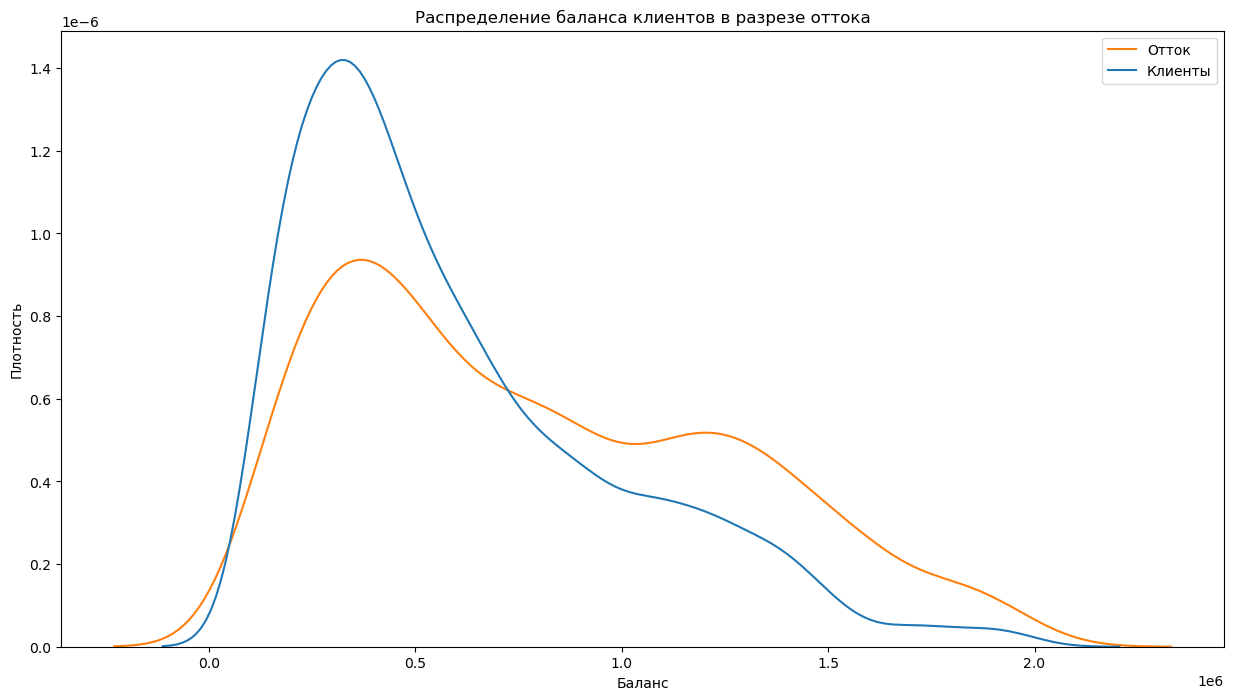

In [47]:
eventss_balance = eventss.query('100000 <= balance <= 2000000')
plt.figure(figsize=(15,8))
sns.kdeplot(data = eventss_balance, x = 'balance', hue = 'churn', common_norm = False);
plt.title(f'Распределение баланса клиентов в разрезе оттока')
plt.legend(['Отток', 'Клиенты'])
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.show()

Из графиков видно что отток клиентов происходит в диапозоне от 100000руб до 2000000руб.

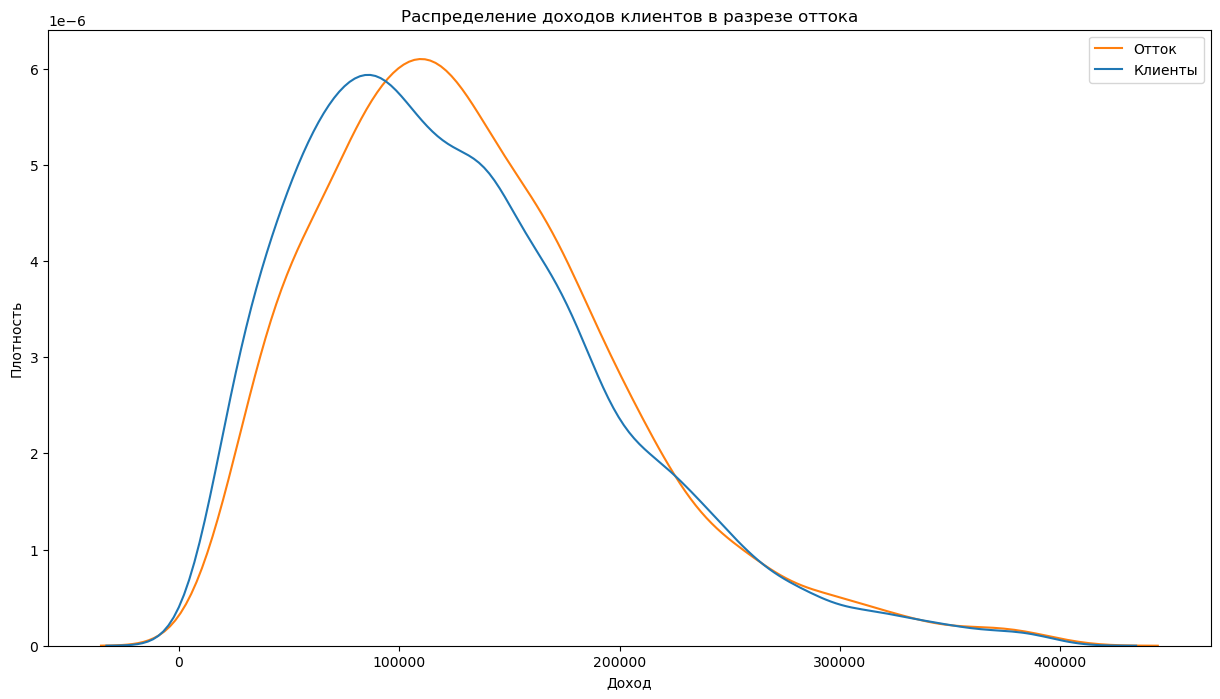

In [48]:
eventss_est_salary = eventss.query('est_salary <= 400000')
plt.figure(figsize=(15,8))
sns.kdeplot(data = eventss_est_salary, x = 'est_salary', hue = 'churn', common_norm = False);
plt.title(f'Распределение доходов клиентов в разрезе оттока')
plt.legend(['Отток', 'Клиенты'])
plt.xlabel('Доход')
plt.ylabel('Плотность')
plt.show()

Из графика видно что у отточных и не отточных клиентов банка почти одинаковый доход, кроме сегмента с средним доходом от 100000 до 250000 руб.

Промежуточные выводы:
- Больше всего подверженны оттоку клиенты в Ярославле.  
- Больше всего подверженны оттоку мужчины.  
- Количество отточных клиентов увеличивается с ростом баллов собственности.
- Больше всего подверженны оттоку клиенты пользующиеся 4 продуктами банка, но в общем с увеличением количества продуктов растёт количество отточных клиентов.
- Больше всего подверженны оттоку клиенты не пользующихся кредитными картами банка.
- Больше всего подверженны оттоку активные клиенты.
- На графике "Распредиление клиентов по признаку *score*" видно что отточных клиентов больше в сегменте от 800 до 900 баллов кредитного рейтинга. 
- На графике "Распределение клиентов по признаку *balance*" видно что отток клиентов происходит в диапозоне от 100000руб до 2000000руб.
- На графике "Распредиление клиентов по признаку *est_salary*" видно что у отточных и не отточных клиентов банка почти одинаковый доход, кроме сегмента с средним доходом от 10000 до 250000 руб.
- На графике "Распредиление клиентов по признаку *Возраст*" видно что наиболее подверженны оттоку клиенты в возрасте от 25 до 35 лет и от 50 до 60 лет.

Изучим портреты отточных и неотточных клиентов.

Посмотрим среднее распределение признаков.

In [49]:
portr = eventss.groupby('churn').median(numeric_only=True).round(2).T
portr['difference, %'] = round(((portr[1] - portr[0]) / portr[0]) * 100, 2)
display(portr.sort_values(by = 'difference, %', ascending = False))

churn,0,1,"difference, %"
last_activity,0.00,1.00,inf
gender_М,0.00,1.00,inf
last_activity_es,0.00,1.00,inf
balance,475382.44,783908.90,64.90
equity,3.00,4.00,33.33
est_salary,118247.25,125408.88,6.06
score,848.00,866.00,2.12
products,2.00,2.00,0.00
credit_card,1.00,1.00,0.00
city_Ярославль,1.00,1.00,0.00


Обобщённый портрет клиента банка:  
  
- небольшой перевес в сторону женщин,
- возраст 40 года,
- не менее 3 баллов собственности,
- средний остаток на счетах 475 тыс. руб,
- средний доход около 118 тыс. руб,
- пользуется 2 продуктами,
- пользуется 1 кредитной картой,
- средней активности.

Портрет отточного клиента:

- не большой перевес в сторону мужчин,
- средний возраст 39 лет,
- 4 баллов собственности,
- средний остаток на счетах 783 тыс. руб,
- средний доход около 125 тыс. руб,
- пользуется 2 продуктами,
- пользуется 1 кредитной картой,
- активность немного выше, чем у не активных клиентов.

**Вывод**:  
  
- Доля отточных клиентов составляет 18,2%.
- Наибольшее количество отточных клиентов в Ярославле.
- Среди отточных клиентов мужчин больше чем женщин.
- Количество отточных клиентов увеличивается с ростом баллов собственности.
- Больше всего подверженны оттоку клиенты пользующиеся 4 продуктами банка, но в общем с увеличением количества продуктов растёт количество отточных клиентов.
- Самый высокий процент оттока у клиентов не пользующихся кредитными картами банка.
- Отток активных клиентов больше чем не активных.
- Отточных клиентов больше в сегменте от 800 до 900 баллов кредитного рейтинга. 
- По балансу отток клиентов происходит в диапозоне от 100000руб до 2000000руб.
- У отточных и не отточных клиентов банка почти одинаковый доход, кроме сегмента с средним доходом от 10000 до 250000 руб.
- Больше всего подверженны оттоку клиенты в возрасте от 25 до 35 лет и от 50 до 60 лет.

### Корреляционный анализ.

Построим матрицу корреляции.

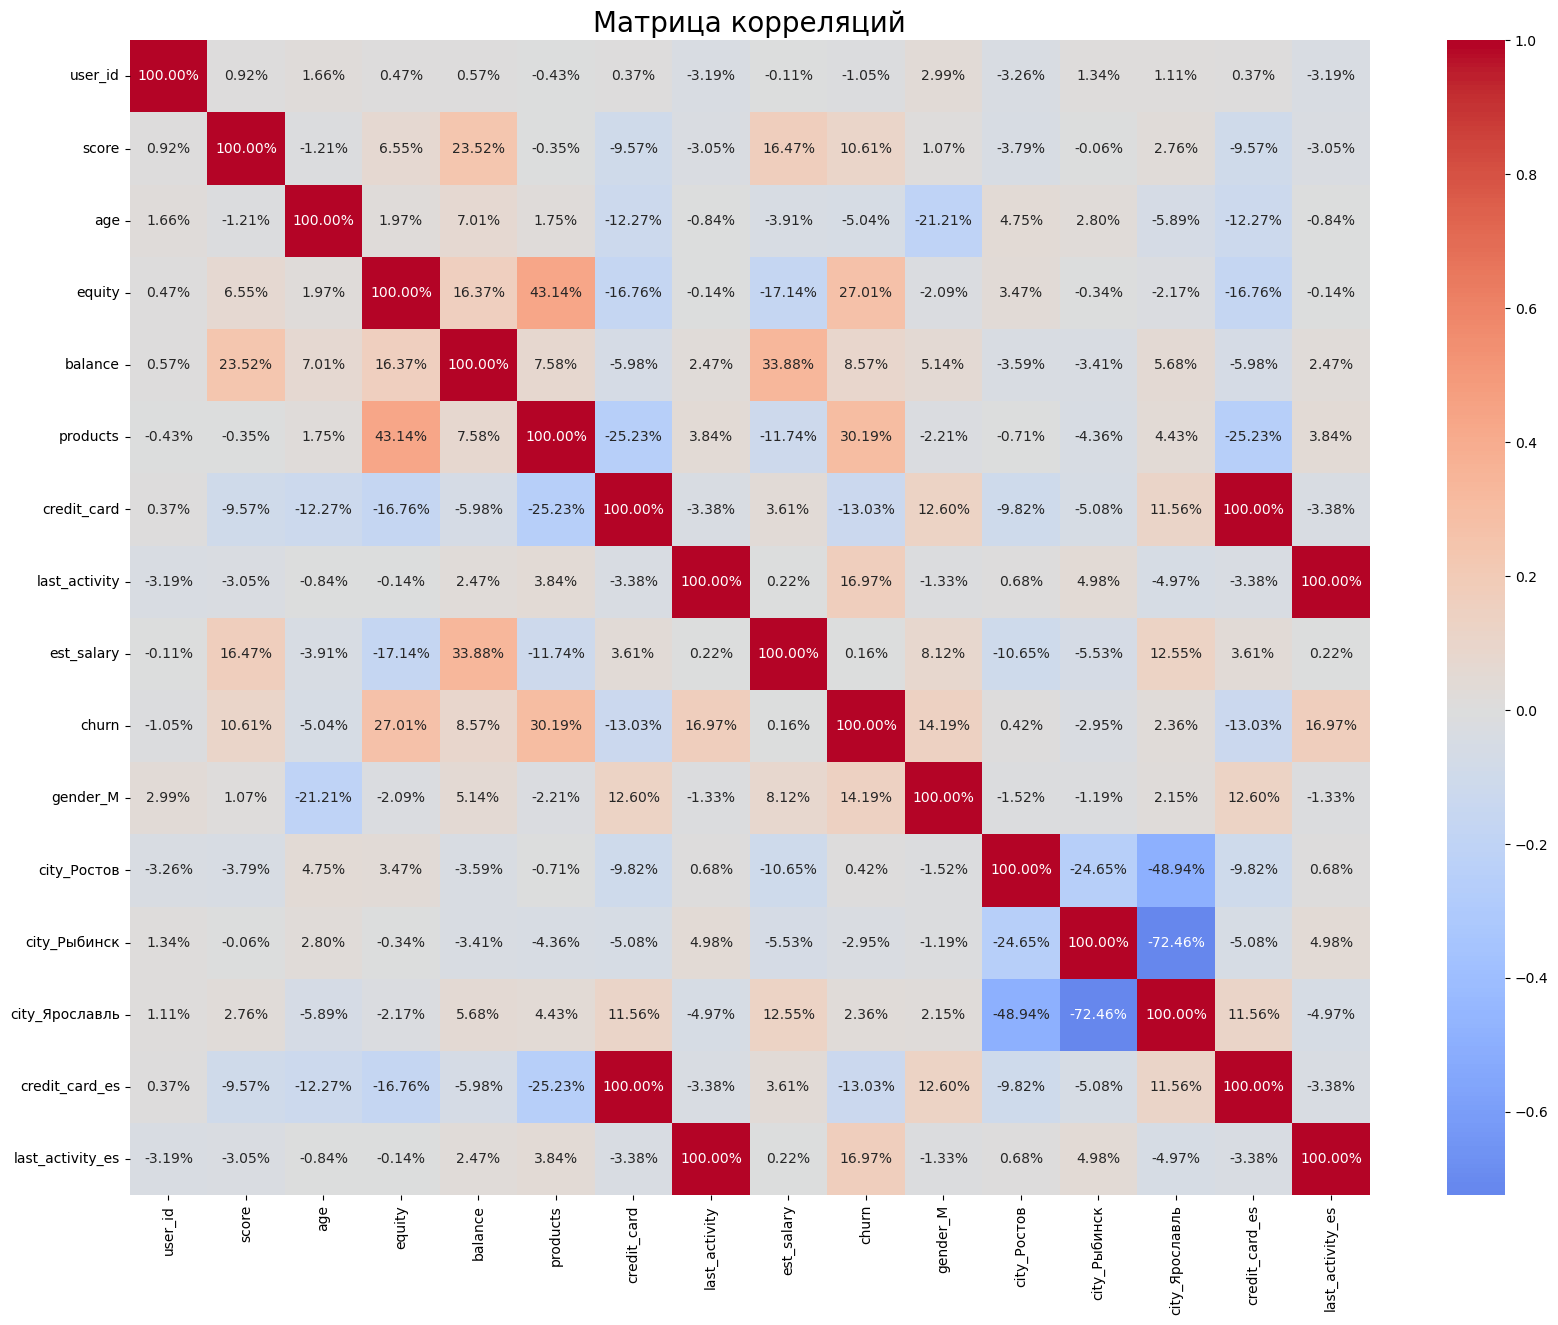

In [50]:
corr_matrix = eventss.corr(numeric_only=True)

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, center = 0 ,cmap = "coolwarm", annot = True, fmt = '.2%')
plt.title('Матрица корреляций', fontsize = 20)
plt.show()

Построим отдельно тепловую карту корреляций признаков непосредственно с оттоком.

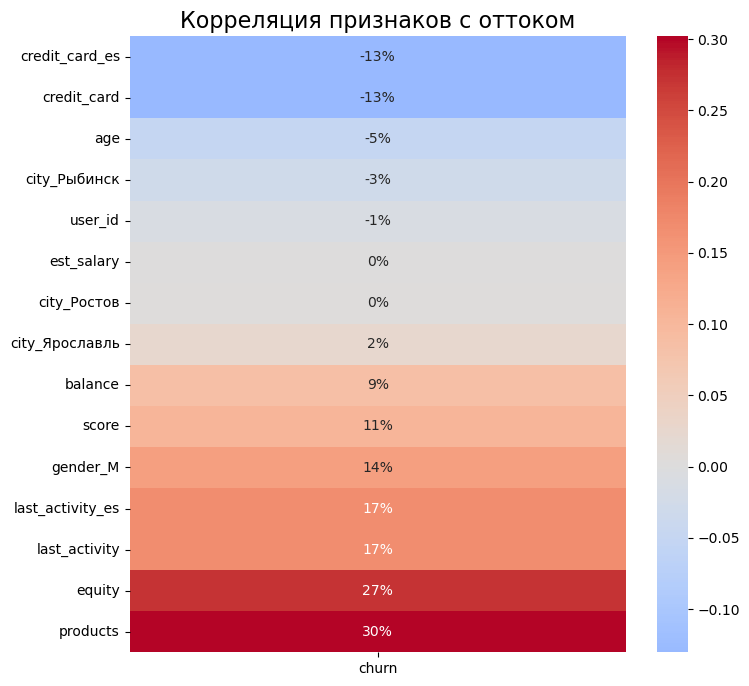

In [51]:
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix.loc[:,['churn']].drop('churn').sort_values('churn'), annot = True, fmt = '.0%', cmap = 'coolwarm', center = 0)
plt.title('Корреляция признаков с оттоком', fontsize = 16)
plt.show()

Присутствует слабая связь с количеством продуктов, баллами собственности, активностью и кредитными картами. Чем больше продуктов банка использует клиент, чем больше у него баллов собственности, чем выше активность тем больше вероятность оттока и чем меньше клиент пользуется кредитными картами, тем больше вероятность оттока. 

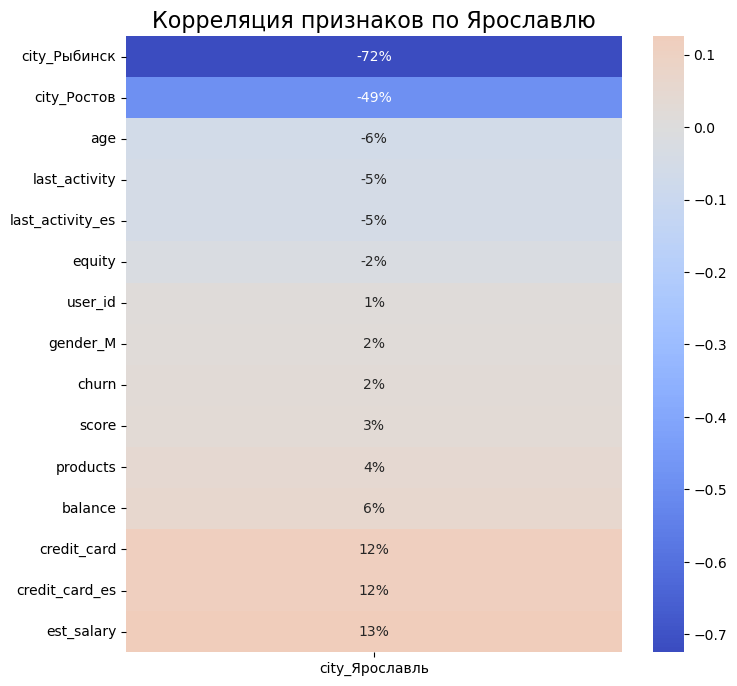

In [52]:
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix.loc[:,['city_Ярославль']].drop('city_Ярославль').sort_values('city_Ярославль'), annot = True, fmt = '.0%', cmap = 'coolwarm', center = 0)
plt.title('Корреляция признаков по Ярославлю', fontsize = 16)
plt.show()

Есть слабая связь с общим доходом и кредитными картами, чем выше общий доход и чем больше клиент пользуется кредитными картами, тем выше вероятность оттока.

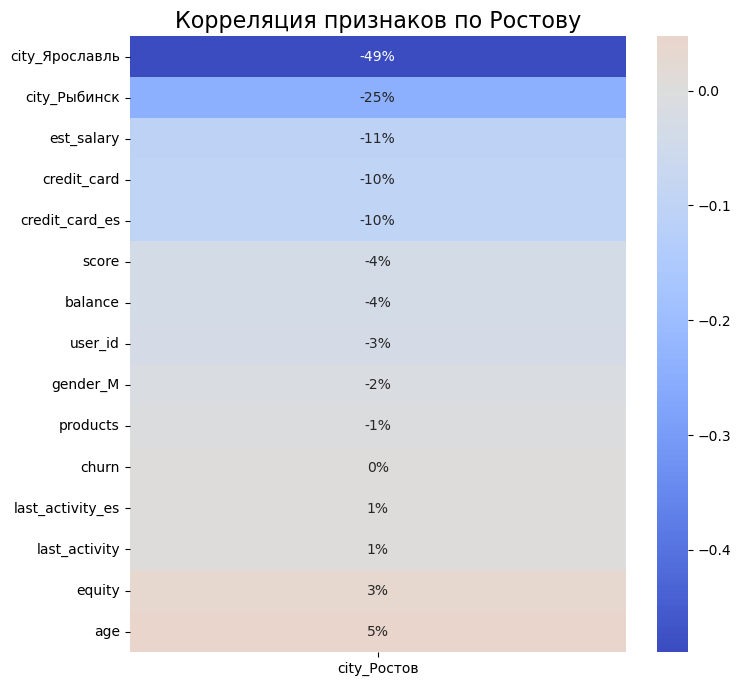

In [53]:
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix.loc[:,['city_Ростов']].drop('city_Ростов').sort_values('city_Ростов'), annot = True, fmt = '.0%', cmap = 'coolwarm', center = 0)
plt.title('Корреляция признаков по Ростову', fontsize = 16)
plt.show()

Есть слабая связь с общим доходом и кредитными картами, чем меньше общий доход и чем меньше клиент пользуется кредитными картами, тем выше вероятность оттока.

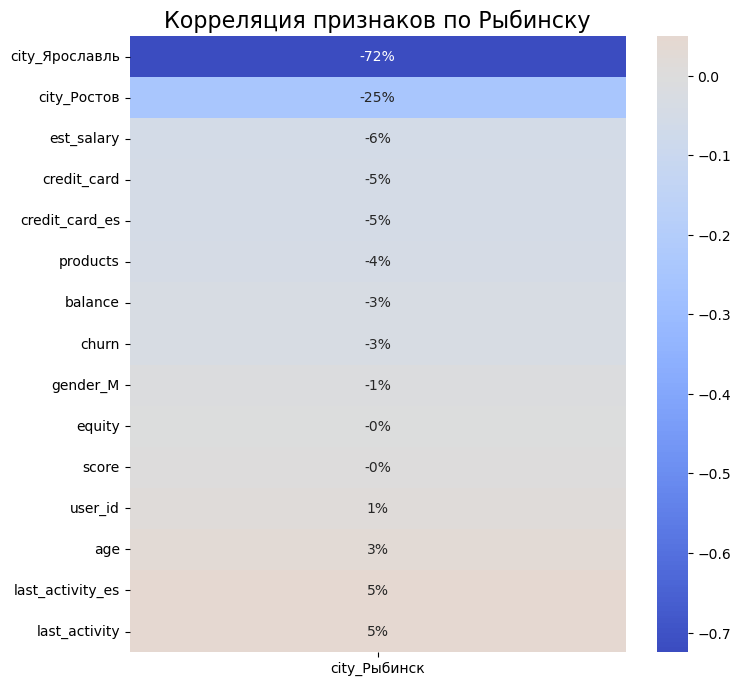

In [54]:
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix.loc[:,['city_Рыбинск']].drop('city_Рыбинск').sort_values('city_Рыбинск'), annot = True, fmt = '.0%', cmap = 'coolwarm', center = 0)
plt.title('Корреляция признаков по Рыбинску', fontsize = 16)
plt.show()

Есть слабая связь с активностью, общим доходом и кредитными картами, чем выше активность клиента, тем больше вероятность оттока, чем меньше общий доход и чем меньше клиент пользуется кредитными картами, тем выше вероятность оттока.

Промежуточный вывод:  
  
Практически везде в основном присутствует слабая связь с активностью, общим доходом и практически везде с использованием кредитных карт.

## Проверка статистических гипотез.

### Влияет ли отток на доходы клиентов?

H0: в среднем доходы отточных клиентов равны доходам не отточных клиентов банка.

H1: в среднем доходы отточных клиентов отличаются от доходов не отточных клиентов банка.

**T-критерий Стьюдента**

Три аспекта, которые надо проверить, чтобы понять, можно ли применять *t-тест*:

- Генеральные совокупности не должны зависеть друг от друга.
- Выборочные средние должны быть нормально распределены.
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны.

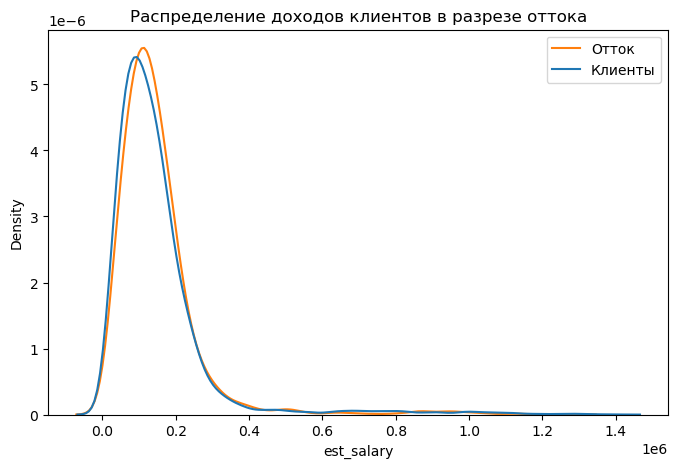

In [55]:
plt.figure(figsize=(8,5))
sns.kdeplot(data = eventss, x = 'est_salary', hue = 'churn', common_norm = False);
plt.title(f'Распределение доходов клиентов в разрезе оттока')
plt.legend(['Отток', 'Клиенты'])
plt.show()

Совокупности не зависят друг от друга, доходы распределены равномерно.

In [56]:
salary_0 = eventss.query('churn == 0')['est_salary']
salary_1 = eventss.query('churn == 1')['est_salary']

print('Описание salary_0')
print(salary_0.describe().round(2))
print('---------------------')
print('Описание salary_1')
print(salary_1.describe().round(2))

Описание salary_0
count       8105.00
mean      147788.27
std       142792.18
min         2546.30
25%        73489.66
50%       118247.25
75%       174087.83
max      1395064.45
Name: est_salary, dtype: float64
---------------------
Описание salary_1
count       1818.00
mean      148357.48
std       122931.98
min        10880.27
25%        83285.66
50%       125408.88
75%       176017.84
max      1263028.49
Name: est_salary, dtype: float64


Стандартные отклонения схожи, для анализа можно использовать *t-критерий* Стьюдента.

In [57]:
alpha = 0.01

results = st.ttest_ind(salary_0, salary_1)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу, статистической разницы в доходах клиентов нет")

p-значение: 0.8749429961814755
Не получилось отвергнуть нулевую гипотезу, статистической разницы в доходах клиентов нет


**U-критерий Манна-Уитни**

Сравним выборки другим способом.  
Главное отличие *U-критерия* Манна-Уитни от *T-критерия* Стьюдента в том, что он работает с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому им пользуются тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих результаты.

In [58]:
alpha = 0.01  # критический уровень статистической значимости

results = st.mannwhitneyu(salary_0, salary_1)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу, статистической разницы в доходах клиентов нет") 

p-значение:  0.00020329119363804673
Отвергаем нулевую гипотезу


Тесты показали разные результаты, но так как в случае с доходами людей, лучше использовать *U-критерий* Манна-Уитни, так как в них могут быть аномальные значения.  
  
Отвергаем нулевую гипотезу о том что в среднем доходы отточных клиентов равны доходам не отточных клиентов банка.

### Влияет ли баллы кредитного рейтинга на отток клиентов банка?

**H0**: в среднем баллы кредитного рейтинга отточных клиентов равны баллам кредитного рейтинга не отточных клиентов банка.  
  
**H1**: в среднем баллы кредитного рейтинга отточных клиентов отличаются от баллов кредитного рейтинга не отточных клиентов банка.

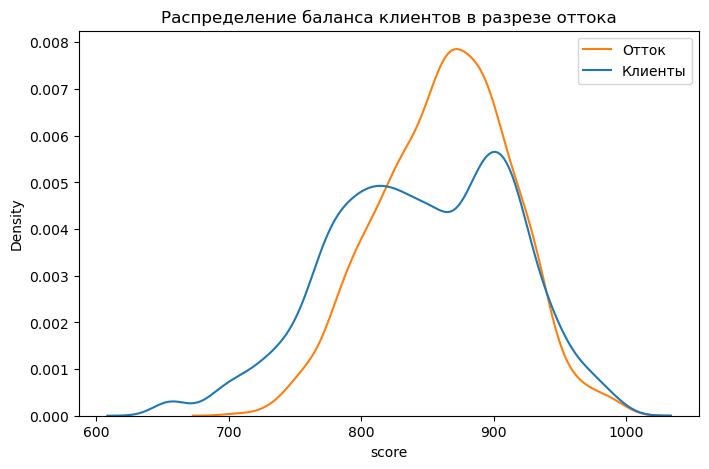

In [59]:
plt.figure(figsize=(8,5))
sns.kdeplot(data = eventss, x = 'score', hue = 'churn', common_norm = False);
plt.title(f'Распределение баланса клиентов в разрезе оттока')
plt.legend(['Отток', 'Клиенты'])
plt.show()

In [60]:
score_0 = eventss.query('churn == 0')['score']
score_1 = eventss.query('churn == 1')['score']

print('Описание score_0')
print(score_0.describe().round(2))
print('---------------------')
print('Описание score_1')
print(score_1.describe().round(2))

Описание score_0
count    8105.00
mean      845.44
std        68.01
min       642.00
25%       796.00
50%       848.00
75%       900.00
max      1000.00
Name: score, dtype: float64
---------------------
Описание score_1
count    1818.00
mean      863.36
std        49.58
min       706.00
25%       828.00
50%       866.00
75%       898.00
max      1000.00
Name: score, dtype: float64


Распределение нормальное, стандартные отклонения схожи. Применим *t-критерий* Стьюдента.

In [61]:
alpha = 0.01

results = st.ttest_ind(score_0, score_1)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу, статистической разницы в баллах кредитного рейтинга клиентов нет")

p-значение: 3.2080115980737186e-26
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, то есть присутствует статистически значимая разница между баллами кредитного рейтинга отточных и неотточных клиентов.

## Промежуточный итог.

- Названия колонок приведены к единому стилю.
- Заменили тип данных у колонок *score* и *age*.
- Удалили пропуски в столбце *age*.
- Пропуски в столбце *balance* решено оставить, так как при их удалении или заполнении можем получить искажение результатов.
- Проведено кодирование столбцов *gender* и *city*.
- Сделанно удаление не явных дубликатов в столбце *user_id*.

- Доля отточных клиентов составляет 18,2%.
- Наибольшее количество отточных клиентов в Ярославле.
- Среди отточных клиентов мужчин больше чем женщин.
- Количество отточных клиентов увеличивается с ростом баллов собственности.
- Больше всего подверженны оттоку клиенты пользующиеся 4 продуктами банка, но в общем с увеличением количества продуктов растёт количество отточных клиентов.
- Самый высокий процент оттока у клиентов не пользующихся кредитными картами банка.
- Отток активных клиентов больше чем не активных.
- Отточных клиентов больше в сегменте от 800 до 900 баллов кредитного рейтинга.
- По балансу отток клиентов происходит в диапозоне от 100000руб до 2000000руб.
- У отточных и не отточных клиентов банка почти одинаковый доход, кроме сегмента с средним доходом от 10000 до 250000 руб.
- Больше всего подверженны оттоку клиенты в возрасте от 25 до 35 лет и от 50 до 60 лет.

Практически везде в основном присутствует слабая связь с активностью, общим доходом и практически везде с использованием кредитных карт.

- Отвергаем нулевую гипотезу о том что в среднем доходы отточных клиентов равны доходам не отточных клиентов банка.  
- Нулевая гипотеза отвергнута, то есть присутствует статистически значимая разница между баллами кредитного рейтинга отточных и неотточных клиентов.

## Сегментация клиентов

Выделим сегменты клиентов с наибольшей вероятностью оттока

In [62]:
print('Сегмент клиентов от 25 с балансом от 900 тыс до 3500 тыс')
print('Процент оттока: {:.2%}'.format(eventss.query('25 <= age and (900000 <= balance <= 3500000)')['churn'].mean()))
print('Размер группы:', eventss.query('25 <= age and (900000 <= balance <= 3500000)')['churn'].count())
print('---------------------------------------')

print('Сегмент клиентов с 4 продуктами банка')
print('Процент оттока: {:.2%}'.format(eventss.query('products == 4')['churn'].mean()))
print('Размер группы:', eventss.query('products == 4')['churn'].count())
print('---------------------------------------')

print('Сегмент клиентов с кредитным рейтингом выше 800 баллов и ниже 900 баллов в возрасте до 60 лет с балансом до 20 млн')
print('Процент оттока: {:.2%}'.format(eventss.query('800 <= score >= 900 and (age <= 60) and (balance <= 20000000)')['churn'].mean()))
print('Размер группы:', eventss.query('800 <= score >= 900 and (age <= 60) and (balance <= 20000000)')['churn'].count())
print('---------------------------------------')

Сегмент клиентов от 25 с балансом от 900 тыс до 3500 тыс
Процент оттока: 36.95%
Размер группы: 1992
---------------------------------------
Сегмент клиентов с 4 продуктами банка
Процент оттока: 63.29%
Размер группы: 474
---------------------------------------
Сегмент клиентов с кредитным рейтингом выше 800 баллов и ниже 900 баллов в возрасте до 60 лет с балансом до 20 млн
Процент оттока: 37.28%
Размер группы: 1124
---------------------------------------


## Рекомендации для отдела маркетинга.

- Процент оттока клиентов пользующихся 4 продуктами банка составляет - 63,29%. Предлагаю для уменьшения оттока клиентов с этого сегмента пересмотреть условия продуктов для изменения данных продуктов. Например увеличить процентные ставки по вкладам, добавить более краткосрочные вклады или более долгосрочные с возможностью пополнения или с ежемесячной выплатой процентов по вкладам. Можно так же снизить процентные ставки по кредитным картам и кредитам.
- Сегмент клиентов с кредитным рейтингом выше 800 баллов и ниже 900 баллов в возрасте до 60 лет с балансом до 20 млн с процентом оттока составляющим 37,28%. Предлагаю провести акции по кредитным продуктам с специально сниженными процентными ставками (можно для каждого клиента сделать специальный расчёт или уменьшение процентной ставки с уменьшением остатка суммы кредита).  
- Для сегмента клиентов от 25 с балансом от 900 тыс до 3500 тыс с уровнем оттока 36,95%. Предлагаю провести акции по накопительным вкладам с повышенной процентной ставкой, так как эта возрастная группа чаще всего уже профессионально состаявшаяся и большая часть достаточно обеспеченная, то они начинают искать возможности для увеличения и сохранения своих денежных активов, или для покупки дорогостоящих предметов. Ещё можно провести акции по кредитным продуктам для дорогостоящих покупок таких как машина, квартира, дача, земельный участок для постройки жилого дома.

Ссылка на презентацию: https://drive.google.com/file/d/1-B_rwLXcsu2Ric2h-O3f-5W5BuGOHlGG/view?usp=sharing